# Import Libraries

In [1]:
# Importing Libraries
from textblob import TextBlob
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Import .csv File

In [2]:
# Creating Path
path = r'C:\Users\anush\20th_Century'

In [3]:
# Loading the twentieth-century data from the CSV file
countries_data = pd.read_csv(os.path.join(path, 'countries_list_20th_century_1.5.csv'), index_col = False)

# Displaying the first few rows to verify the content
countries_data.head()

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [4]:
# Dropping 'Unnamed: 0' Column
countries_data = countries_data.drop(columns=['Unnamed: 0'])
countries_data.head()

,country_name
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


# Tokenize the words

In [5]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [6]:
# Tokenizing the country names
country_names = countries_data['country_name'].dropna()  # Dropping any missing values
tokenized_words = []

In [7]:
# Tokenizing each country name into words
for country in country_names:
    tokenized_words.extend(word_tokenize(country))

In [8]:
# Calculate the frequency distribution
freq_dist = FreqDist(tokenized_words)

# create a bar chart to plot the 10 most common words

In [9]:
# Get the 10 most common words
common_words = freq_dist.most_common(10)

In [10]:
common_words

[('Republic', 9),
 (',', 8),
 ('and', 6),
 ('of', 4),
 ('Guinea', 4),
 ('South', 4),
 ('People', 3),
 ("'s", 3),
 ('the', 3),
 ('Islands', 3)]

In [11]:
# Split the words and their frequencies for plotting
words, frequencies = zip(*common_words)

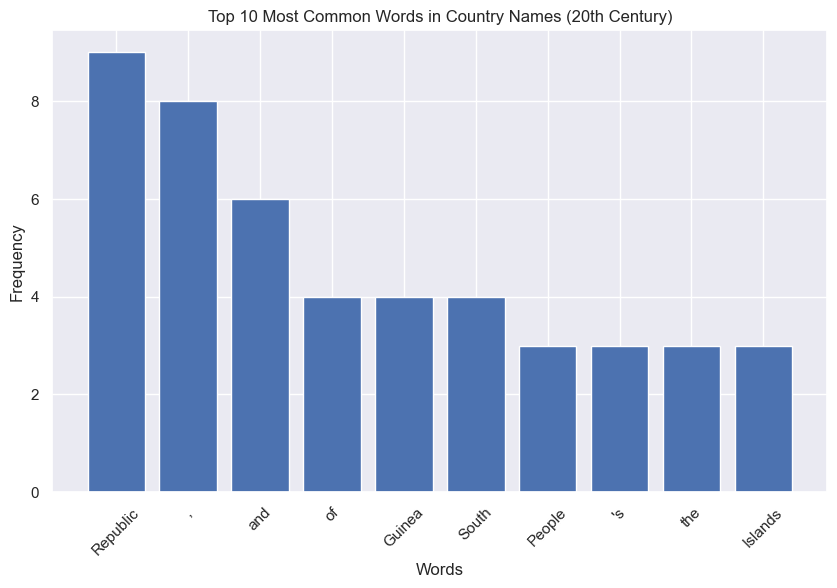

In [12]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Country Names (20th Century)')
plt.xticks(rotation=45)
plt.show()

# Remove stop words

In [18]:
from nltk.corpus import stopwords
import string
import re

In [14]:
# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [15]:
# Extra words to remove
new_stopwords = ["And", "Then", "n", "t", "s", "The", "and", "of", "the", "republic's"]

In [16]:
# Tokenizing the country names into words
filtered_words = []
for country in country_names:
    words = word_tokenize(country)
    # Convert words to lowercase and remove stop words, punctuation, and possessives
    for word in words:
        cleaned_word = re.sub(r"'s$", "", word.lower())  # Remove possessive 's
        if cleaned_word and cleaned_word not in stop_words and cleaned_word not in punctuation and cleaned_word not in new_stopwords:
            filtered_words.append(cleaned_word)

In [19]:
# Remove punctuation from the text (without tokenizing yet)
sans_punc = ' '.join(filtered_words)  # Join words back to a string

# Tokenize again after removing punctuation
tokenized_word_2 = word_tokenize(sans_punc)

In [20]:
# Create a frequency distribution
dist_words_filter_2 = FreqDist(filtered_words)

In [21]:
# Get the 10 most common words
common_words_1 = dist_words_filter_2.most_common(10)
print(common_words_1)

[('republic', 9), ('guinea', 4), ('south', 4), ('people', 3), ('islands', 3), ('saint', 3), ('united', 3), ('congo', 2), ('democratic', 2), ('cyprus', 2)]


In [22]:
# Split the words and their frequencies for plotting
words, frequencies = zip(*common_words_1)

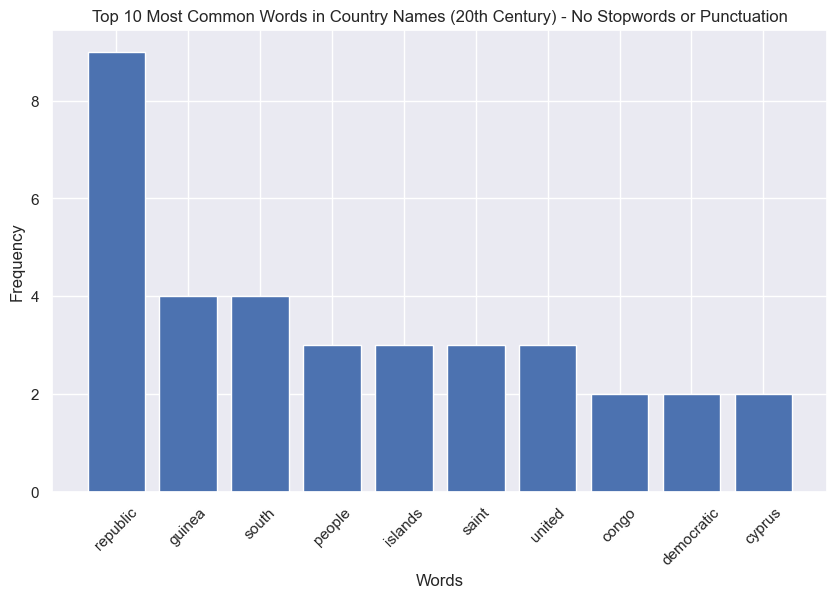

In [23]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Country Names (20th Century) - No Stopwords or Punctuation')
plt.xticks(rotation=45)
plt.show()

# Impressions and Analysis:

### What has changed?

After removing stop words and punctuation, the word frequency list is much cleaner and more focused on meaningful words. Here's what stands out:

1. **Stop Words Removed**: Common words such as `and`, `the`, `of`, `s`, and punctuation marks (e.g., commas and apostrophes) have been removed. These words are typically used to structure sentences but don't contribute significant meaning for content analysis.
   
2. **Key Words Remain**: The remaining words, like `republic`, `guinea`, `south`, `people`, and `islands`, are more meaningful and represent core themes or entities in the text. This allows for a clearer understanding of the topics being discussed.

3. **Improved Clarity**: With stop words and punctuation out of the way, the frequency distribution now highlights the primary subjects, making it easier to identify trends and key terms in the text.

### Conclusion:

The removal of stop words has refined the data, leaving us with words that are more representative of the content. This is useful for focusing on important concepts and producing a cleaner analysis when visualizing the frequency of words.

# Create a tags list using TextBlob

In [24]:
# Create a TextBlob object from the tokenized words
text_blob = TextBlob(" ".join(tokenized_word_2))  # Join the filtered words into a single string

# Generate POS tags using TextBlob
tags_list = text_blob.tags

# Display the tags list
print(tags_list)

[('afghanistan', 'JJ'), ('albania', 'NN'), ('algeria', 'NNS'), ('andorra', 'VBP'), ('angola', 'JJ'), ('antigua', 'NN'), ('barbuda', 'NN'), ('argentina', 'IN'), ('armenia', 'NN'), ('australia', 'NNS'), ('austria', 'VBP'), ('azerbaijan', 'JJ'), ('bahamas', 'NN'), ('bahrain', 'NN'), ('bangladesh', 'JJ'), ('barbados', 'NN'), ('belarus', 'NN'), ('belgium', 'NN'), ('belize', 'VBP'), ('benin', 'NN'), ('bhutan', 'NN'), ('bolivia', 'NN'), ('bosnia', 'NN'), ('herzegovina', 'NN'), ('botswana', 'NN'), ('brazil', 'NN'), ('brunei', 'NN'), ('bulgaria', 'NN'), ('burkina', 'NN'), ('faso', 'NN'), ('burundi', 'NN'), ('cambodia', 'NN'), ('cameroon', 'NN'), ('canada', 'NN'), ('cape', 'NN'), ('verde', 'JJ'), ('central', 'JJ'), ('african', 'JJ'), ('republic', 'NN'), ('chad', 'VBD'), ('chile', 'JJ'), ('china', 'NN'), ('people', 'NNS'), ('republic', 'VBP'), ('colombia', 'JJ'), ('comoros', 'NNS'), ('congo', 'VBP'), ('democratic', 'JJ'), ('republic', 'JJ'), ('congo', 'NN'), ('republic', 'JJ'), ('costa', 'NN'), (

# Create a list of the Top 10 POS tags for words

In [25]:
# Extract POS tags (second element in the tuple)
pos_tags = [tag[1] for tag in tags_list]

# Count the frequency of each POS tag
pos_counts = Counter(pos_tags)

In [26]:
# Get the 10 most common POS tags
top_10_pos = pos_counts.most_common(10)

In [27]:
top_10_pos

[('NN', 143),
 ('JJ', 63),
 ('VBP', 22),
 ('NNS', 20),
 ('VBZ', 6),
 ('IN', 4),
 ('VBD', 4),
 ('NNP', 2),
 ('RB', 1),
 ('FW', 1)]

In [28]:
# Prepare the data for plotting
pos, frequencies = zip(*top_10_pos)

# Plot this list in a bar chart using the seaborn library

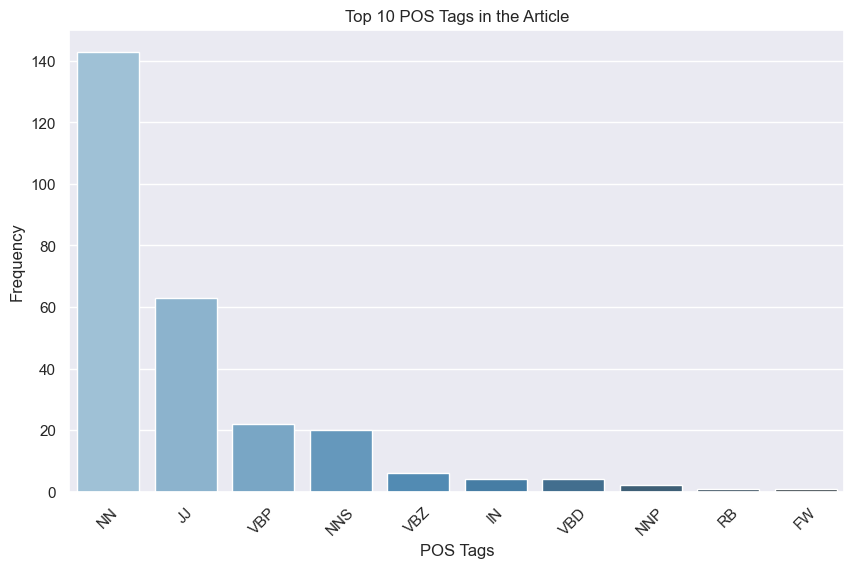

In [29]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(pos), y=list(frequencies), palette="Blues_d")
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Top 10 POS Tags in the Article')
plt.xticks(rotation=45)
plt.show()

# Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

In [30]:
# Convert tags_list into a DataFrame for easier processing
tags_df = pd.DataFrame(tags_list, columns=['Word', 'Word type'])

# Filter and count for Nouns (NN, NNS)
nouns_df = tags_df[(tags_df['Word type'] == "NN") | (tags_df['Word type'] == "NNS")]
nouns_count = nouns_df.groupby('Word').size().reset_index(name='Occurrences')
nouns_sorted = nouns_count.sort_values(by='Occurrences', ascending=False).head(15)

# Filter and count for Verbs (VB, VBD, VBG, VBN, VBP, VBZ)
verbs_df = tags_df[tags_df['Word type'].str.startswith("VB")]
verbs_count = verbs_df.groupby('Word').size().reset_index(name='Occurrences')
verbs_sorted = verbs_count.sort_values(by='Occurrences', ascending=False).head(15)

# Filter and count for Adjectives (JJ, JJR, JJS)
adjectives_df = tags_df[tags_df['Word type'].str.startswith("JJ")]
adjectives_count = adjectives_df.groupby('Word').size().reset_index(name='Occurrences')
adjectives_sorted = adjectives_count.sort_values(by='Occurrences', ascending=False).head(15)

In [33]:
nouns_sorted

,Word,Occurrences
58,guinea,4
117,saint,3
107,people,3
37,cyprus,2
111,republic,2
130,states,2
104,palestine,1
99,myanmar,1
100,nicaragua,1
101,niger,1


In [34]:
verbs_sorted

,Word,Occurrences
25,republic,3
12,islands,2
0,andorra,1
16,lithuania,1
28,sierra,1
27,see,1
26,samoa,1
24,poland,1
23,peru,1
22,papua,1


In [35]:
adjectives_sorted

,Word,Occurrences
37,republic,4
41,south,3
46,united,3
29,new,2
32,north,2
9,democratic,2
39,senegal,1
30,nigeria,1
31,niue,1
33,northern,1


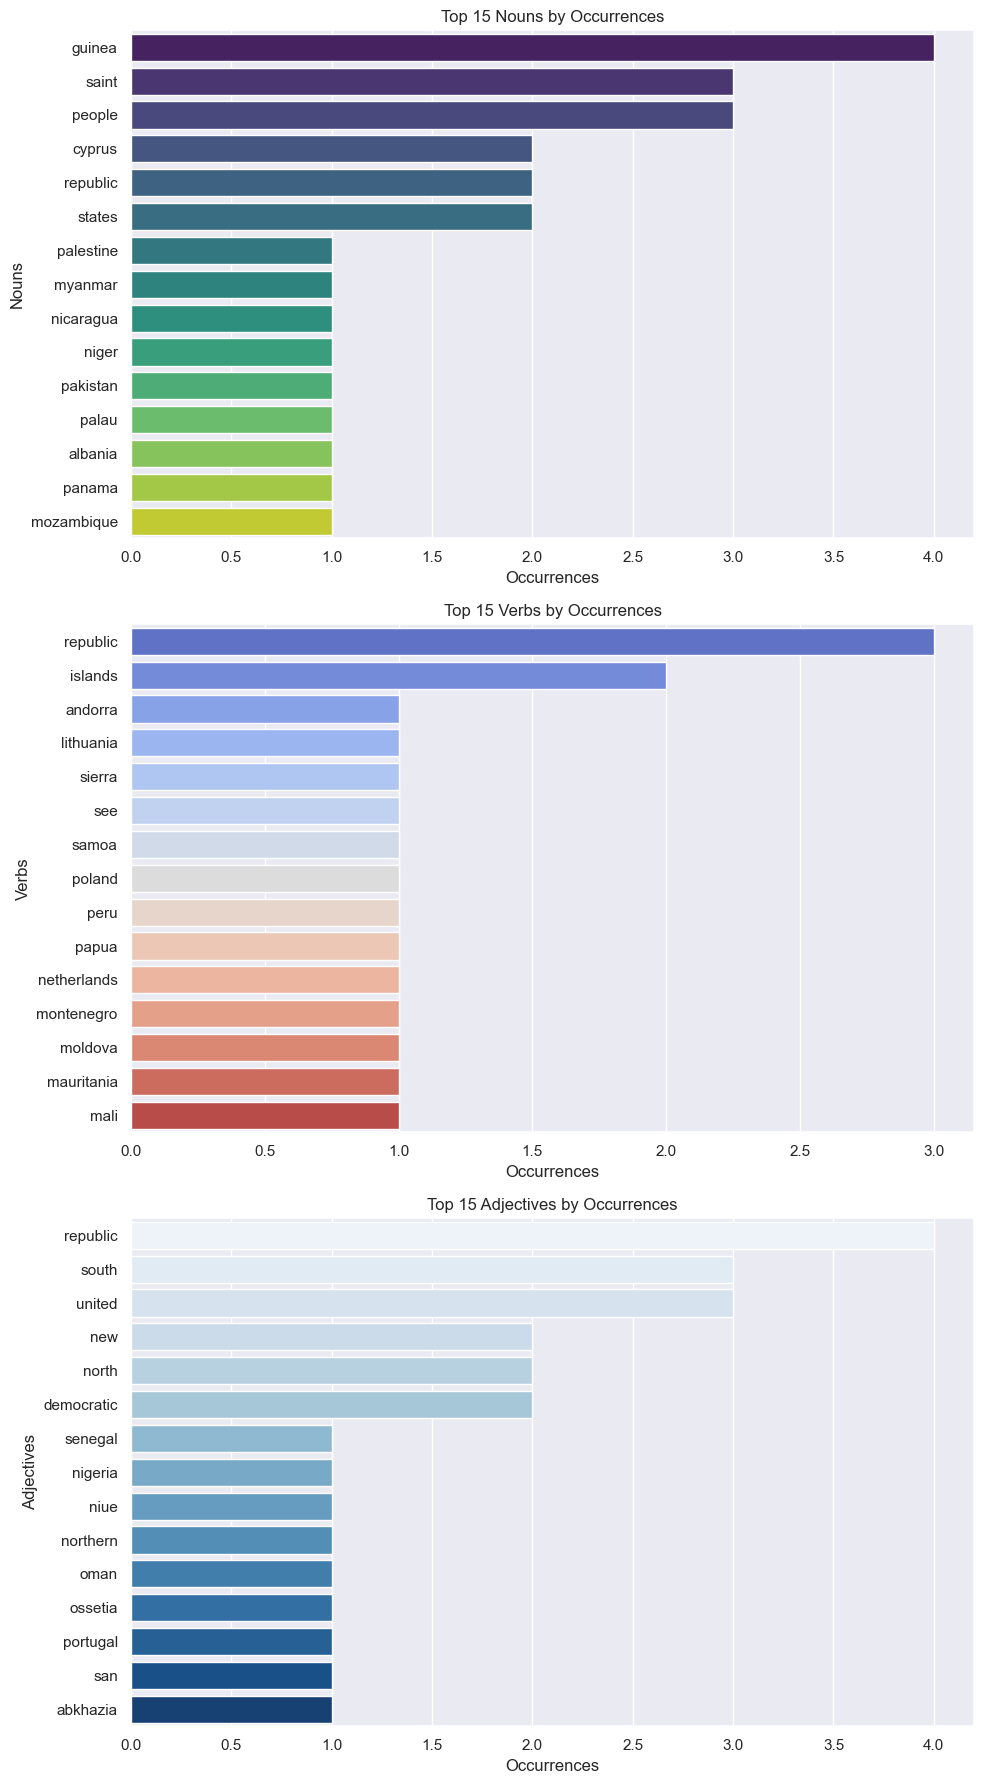

In [32]:
# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Nouns
sns.barplot(x='Occurrences', y='Word', data=nouns_sorted, ax=axes[0], palette='viridis')
axes[0].set_title('Top 15 Nouns by Occurrences')
axes[0].set_xlabel('Occurrences')
axes[0].set_ylabel('Nouns')

# Plot for Verbs
sns.barplot(x='Occurrences', y='Word', data=verbs_sorted, ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 15 Verbs by Occurrences')
axes[1].set_xlabel('Occurrences')
axes[1].set_ylabel('Verbs')

# Plot for Adjectives
sns.barplot(x='Occurrences', y='Word', data=adjectives_sorted, ax=axes[2], palette='Blues')
axes[2].set_title('Top 15 Adjectives by Occurrences')
axes[2].set_xlabel('Occurrences')
axes[2].set_ylabel('Adjectives')

plt.tight_layout()
plt.show()

### The output looks incorrect. 

# Create a dataframe with the countries and the number of times they’re mentioned

In [44]:
# Clean up the country names column and convert it to a list
countries_list = countries_data['country_name'].str.strip().str.lower().tolist()  # Convert 'country_name' column to lowercase list

# Convert the tokenized list into a single string
listToStr = ' '.join([str(elem).lower() for elem in tokenized_word_2])  # Join the list of words into a string and convert to lowercase

In [45]:
# Clean the tokenized words from unwanted characters and count occurrences
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())  # Clean non-alphanumeric characters and split the text

In [46]:
# Step 5: Replace specific country name aliases if necessary
country_mentions = {country: all_counts.get(country, 0) for country in countries_list}  # Ensure no KeyError if country is not found

In [47]:
# Check a few tokenized words to ensure they match the format of country names
print(tokenized_word_2[:20])  # Print the first 20 tokenized words to inspect

['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua', 'barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin']


In [48]:
# Convert the dictionary into a DataFrame for easier manipulation
df_countries = pd.DataFrame(list(country_mentions.items()), columns=["Country", "Times Mentioned"])

# Sort the DataFrame by the 'Times Mentioned' column in descending order
df_sorted_countries = df_countries.sort_values(by="Times Mentioned", ascending=False)

In [49]:
df_sorted_countries

,Country,Times Mentioned
69,guinea,4
43,cyprus,2
166,sudan,2
127,niger,1
118,morocco,1
...,...,...
162,south africa,0
163,south sudan,0
32,central african republic,0
165,sri lanka,0


### Not sure if its correct or not

# Create a plot showing the frequency of the number of times these countries are mentioned

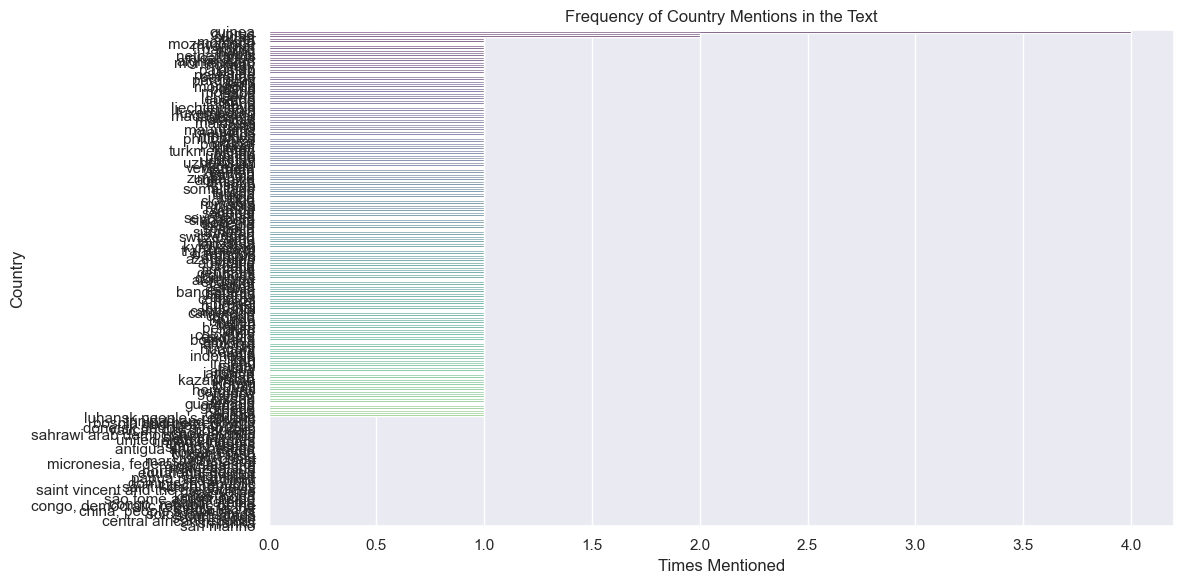

In [52]:
# Step 2: Plot the frequency of mentions using a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x="Times Mentioned", y="Country", data=df_sorted_countries, palette="viridis")  # Create the bar plot

# Add plot labels and title
plt.title('Frequency of Country Mentions in the Text')  # Set the title of the plot
plt.xlabel('Times Mentioned')  # Label for the x-axis
plt.ylabel('Country')  # Label for the y-axis
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot

### for better visibility I am making the plot for top 30

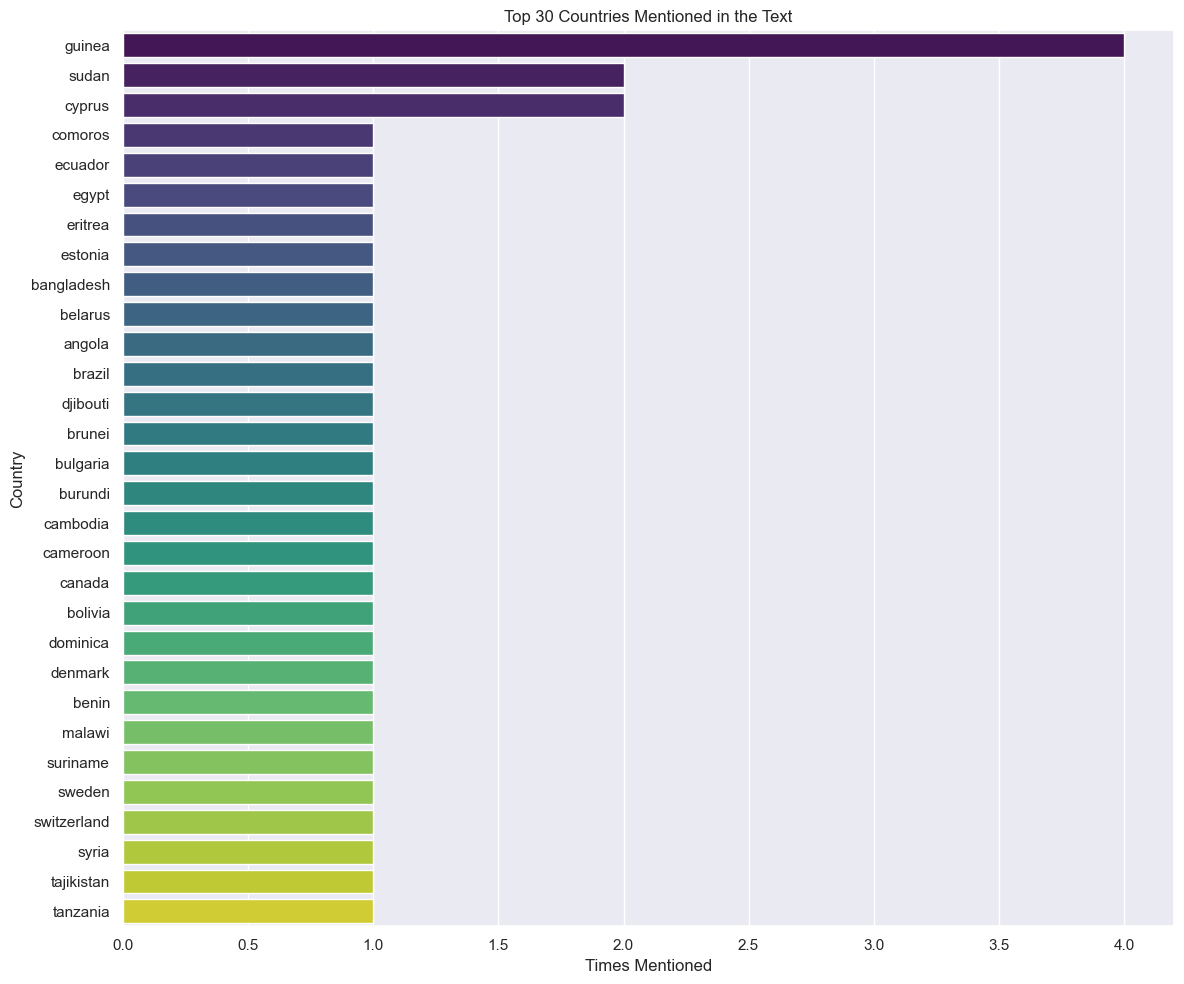

In [53]:
# Sort the DataFrame by "Times Mentioned" in descending order and select the top 30 countries
top_countries = df_sorted_countries.sort_values(by="Times Mentioned", ascending=False).head(30)

# Plot the frequency of mentions using a horizontal bar plot
plt.figure(figsize=(12, 10))  # Set the figure size
sns.barplot(x="Times Mentioned", y="Country", data=top_countries, palette="viridis")  # Create the bar plot

# Add plot labels and title
plt.title('Top 30 Countries Mentioned in the Text')  # Set the title of the plot
plt.xlabel('Times Mentioned')  # Label for the x-axis
plt.ylabel('Country')  # Label for the y-axis
plt.tight_layout()  # Adjust layout to avoid overlap

# Display the plot
plt.show()

In [54]:
top_countries

,Country,Times Mentioned
69,guinea,4
166,sudan,2
43,cyprus,2
37,comoros,1
50,ecuador,1
51,egypt,1
54,eritrea,1
55,estonia,1
13,bangladesh,1
15,belarus,1


### Highly Skewed Data:
The dataset has 208 rows, but only a few countries have significant mentions.
For instance, Guinea is the most frequently mentioned country (4 times), followed by Cyprus and Sudan (2 times each).

### Many Low Mentions:
The majority of countries in the dataset are either not mentioned (0 mentions) or mentioned only once.
This is evident in the full list, where many countries, like South Africa and Sri Lanka, have 0 mentions.

### Top 30 Insights:
In the top 30, many countries are tied with a single mention, emphasizing that the dataset is sparsely distributed.
Some well-known countries, such as Canada and Egypt, appear only once, showing no clear correlation between mentions and global prominence.

### Distribution:
The dataset likely has a long-tail distribution, with a small number of countries being mentioned more frequently while the majority are rarely mentioned.

### Potential Analysis Opportunities:
It would be interesting to explore why Guinea has the highest mentions and if this is linked to specific topics or contexts in the source text.
Investigating patterns across continents or regions could reveal geographic trends.
Filtering out countries with 0 mentions might make future visualizations cleaner and more relevant.